In [103]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray

In [104]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

show_data()

#נשים לב שתמונה מספר 22 תמיד ריקה ואין לה קובץ סי אס וי מתאים לכן נתעלם ממנה.

In [105]:
data = pd.read_csv(r'train/7572/SimpleTest/5.csv')

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          216 non-null    object 
 1    Y         214 non-null    float64
 2    Pressure  214 non-null    float64
 3    TiltX     214 non-null    float64
 4    TiltY     214 non-null    float64
 5    Time      214 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.2+ KB


In [107]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,570.57,597.613333,0.352051,12324.0,11832.0,00:02.0496830
1,570.855,596.726667,0.357910,11729.0,12137.0,00:02.0496830
2,570.855,596.346667,0.370361,11591.0,12237.0,00:02.0655612


In [108]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

print(start_time)
print(submit_time)

Time Elapsed till drawing started: 00:02.0496830
Time Elapsed till drawing submit: 00:07.3696841


In [109]:
total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Total time drawing: 00:5.3200011


In [110]:
data['X'] = data.X.astype(float)

In [111]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

In [112]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,570.570,597.613333,0.352051,12324.0,11832.0,2.049683
1,570.855,596.726667,0.357910,11729.0,12137.0,2.049683
2,570.855,596.346667,0.370361,11591.0,12237.0,2.065561


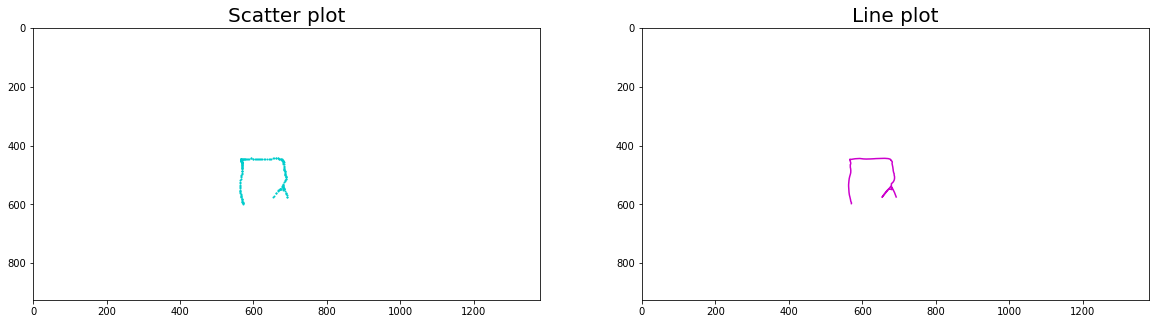

In [113]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

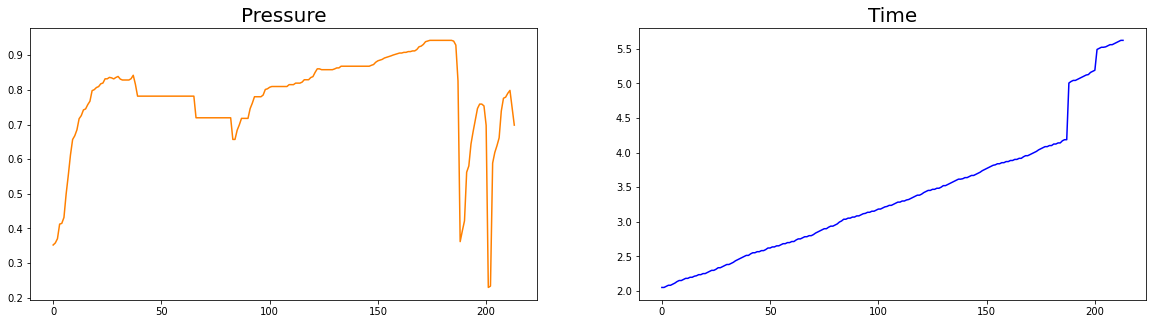

In [114]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [115]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=20).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 1


## *Number of lines:*

In [116]:
distance = []
for x in range(len(data.X)-1):
        distance.append(math.sqrt((data.X[x+1] - data.X[x])**2 + (data.Y[x+1] - data.Y[x])**2))       

In [117]:
distance =pd.Series(distance)

In [118]:
print('max distance:',max(distance),'\nmin distance:',min(distance),'\nmean distance:',distance.mean())

max distance: 44.01089110789607 
min distance: 0.0 
mean distance: 2.3607593450988618


In [119]:
slopes = [] 
for i in range(len(data.X)-1):
    if (data.X[i+1]- data.X[i]) == 0: 
        slopes.append(math.nan)
    else:
        slopes.append((data.Y[i+1]- data.Y[i])/(data.X[i+1]- data.X[i]))

In [120]:
slopes = pd.Series(slopes)

In [121]:
slopes.dropna(inplace=True)

In [122]:
slopes.std()

6.722598475533706

In [123]:
numOfLines = 1
rolling_std = slopes.rolling(window=100).std()

for i in range(len(slopes)-1):
    if (slopes[i+1] > slopes[i] + slopes.std()):
        numOfLines +=1

print("Number of hand lifts: " + str(numOfLines))

KeyError: 1

## *Open or closed shape:*
Only relevant for a number of drawing

(3,4,8,11,13,16,17,19,20,21)

In [81]:
img = Image.open(r'train/7554/SimpleTest/4.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [82]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

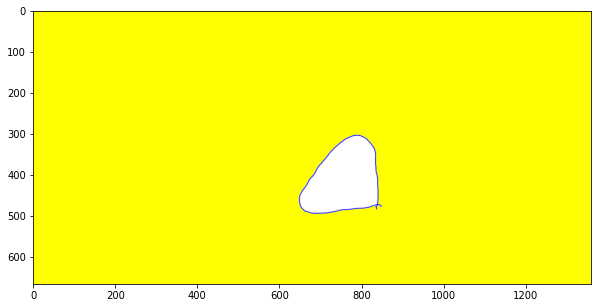

In [83]:
fig = plt.figure(figsize=(10, 7))
  
fig.add_subplot(1, 1, 1)
plt.imshow(img)


In [84]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        for q in range(3):
            if ((im[i][j] == [255,255,255]).all() == True):
                count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Close Shape


<IPython.core.display.Javascript object>


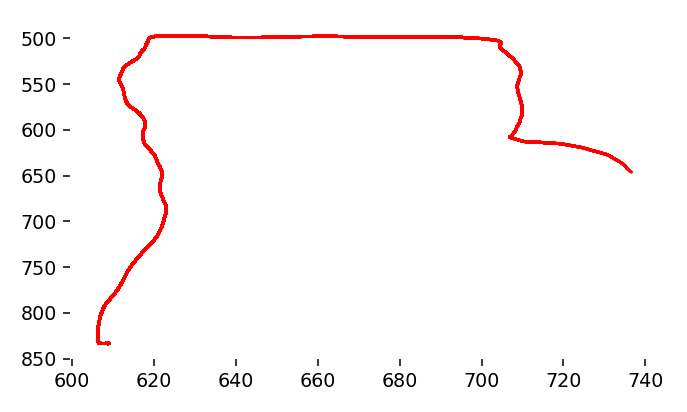

In [62]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [ ]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


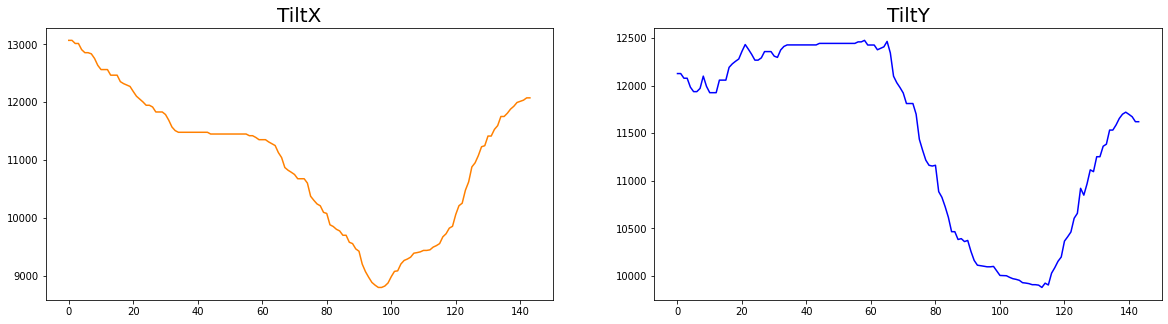

In [96]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.TiltX,"#FF8000")
ax.set_title("TiltX",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.TiltY,c='b')
ax2.set_title("TiltY",fontdict={'fontsize': 20})

plt.show()